**Project 1 from Data Science Nanodegree at Udacity**

This project aims to observe the coder (someone who codes) evolution profile through the years considering their formal degree. 


**1. Business Understanding:**
It was used the [Stack Overflow Surveys datasets from 2017 to 2020](https://insights.stackoverflow.com/survey) to obtain the answer to the following questions:

   1. How important is a formal education, such as a university degree in computer science, to your career?
   2. Is there any bias in the above opinion depending on their major undergrad?
   3. Evaluating the people who had not a formal degree in some course related to Comp. Sci, Web Development or Information Sytem (a lot programming at Undergrad). How they are getting into the field proportionally along the time (number of non-formal degrees in computation employees/time)?
   4. Depending on your degree, there is difference in salary or compensation if you work coding? How does it is indicated along the time?
   5. What is the compensation mean of non CSs depending on their Educational level or Major Undergrad (if it is the case)?


In [175]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

**2. Data Understanding**

*Gathering the necessary data to answer my questions:*


In [176]:
data20 = pd.read_csv('/home/natalia/Documents/coder-evolution/data/data/csv/2020 survey_results_public.csv')
schema20 = pd.read_csv('/home/natalia/Documents/coder-evolution/data/data/csv/2020 survey_results_schema.csv')
data19 = pd.read_csv('/home/natalia/Documents/coder-evolution/data/data/csv/2019 survey_results_public.csv')
schema19 = pd.read_csv('/home/natalia/Documents/coder-evolution/data/data/csv/2019 survey_results_schema.csv')
data18 = pd.read_csv('/home/natalia/Documents/coder-evolution/data/data/csv/2018 survey_results_public.csv', low_memory = False)
schema18 =pd.read_csv('/home/natalia/Documents/coder-evolution/data/data/csv/2018 survey_results_schema.csv')
data17 = pd.read_csv('/home/natalia/Documents/coder-evolution/data/data/csv/2017 survey_results_public.csv')
schema17 = pd.read_csv('/home/natalia/Documents/coder-evolution/data/data/csv/2017 survey_results_schema.csv')


*Assessing which colums have the most suitable questions to answer my questions*

In [177]:
#Searching for the necessary columns to answer my questions
pd.set_option('display.max_columns', None)
pd.set_option('max_rows',100)
pd.options.display.max_colwidth = 500 #increasing the number of characters to be read in a row
schema20.head() #Schema of 2020 dataset with the Question texts of each column

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order of survey response time)
1,MainBranch,"Which of the following options best describes you today? Here, by ""developer"" we mean ""someone who writes code."""
2,Hobbyist,Do you code as a hobby?
3,Age,"What is your age (in years)? If you prefer not to answer, you may leave this question blank."
4,Age1stCode,"At what age did you write your first line of code or program? (e.g., webpage, Hello World, Scratch project)"


In [178]:
data20.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,Microsoft SQL Server,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;Developer, full-stack","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-employed",White or of European descent,Man,"Languages, frameworks, and other technologies I’d be working with;Remote work options;Opportunities for professional development",Slightly satisfied,I am not interested in new job opportunities,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,.NET Core;Xamarin,.NET;.NET Core,Microsoft Teams;Microsoft Azure;Trello,Confluence;Jira;Slack;Microsoft Azure;Trello,No,Somewhat important,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,Often: 1-2 days per week or more,Start a free trial;Ask developers I know/work with,Amused,Stack Overflow (public Q&A for anyone who codes),Visit Stack Overflow;Go for a walk or other physical activity;Do other work and come back later,Windows,2 to 9 employees,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,NaN,Straight / Heterosexual,No,"No, not at all",NaN,Multiple times per day,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or software engineering",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,GBP,NaN,NaN,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,NaN,NaN,Very dissatisfied,I am not interested in new job opportunities,Python;Swift,JavaScript;Swift,React Native;TensorFlow;Unity 3D,React Native,Github;Slack,Confluence;Jira;Github;Gitlab;Slack,NaN,NaN,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,NaN,NaN,Amused,Stack Overflow (public Q&A for anyone who codes);Stack Exchange (public Q&A for a variety of topics);Stack Overflow Jobs (for job seekers),Visit Stack Overflow;Go for a walk or other physical activity,MacOS,"1,000 to 4,999 employees",iOS;Kubernetes;Linux;MacOS,iOS,I have little or no influence,NaN,Yes,"Yes, definitely",Less than once per month or monthly,Multiple times per day,NaN,NaN,NaN,"Computer science, computer engineering, or software engineering",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Once a decade,NaN,NaN,No,NaN,NaN,NaN,Stack Overflow (public Q&A for anyone who codes),NaN,Linux-based,NaN,NaN,NaN,NaN,NaN,Yes,"Yes, somewhat",A few times per month or weekly,Daily or almost daily,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,ALL,NaN,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,White or of European descent,Man,Flex time or a flexible schedule;Office environment or company culture;Opportunities for professional developmen

In [179]:
schema19.head()

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order of survey response time)
1,MainBranch,"Which of the following options best describes you today? Here, by ""developer"" we mean ""someone who writes code."""
2,Hobbyist,Do you code as a hobby?
3,OpenSourcer,How often do you contribute to open source?
4,OpenSource,How do you feel about the quality of open source software (OSS)?


In [180]:
data19.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software is about the same,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or tool without taking a formal course",NaN,NaN,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Node.js,Node.js,IntelliJ;Notepad++;PyCharm,Windows,I do not use containers,NaN,NaN,Yes,"Fortunately, someone else has that title",Yes,Twitter,Online,Username,2017,A few times per month or weekly,Find answers to specific questions;Learn how to do things I didn’t necessarily look for,3-5 times per week,Stack Overflow was much faster,31-60 minutes,No,NaN,"No, I didn't know that Stack Overflow had a job board","No, and I don't know what those are",Neutral,Just as welcome now as I felt last year,Tech articles written by other developers;Industry news about technologies you're interested in;Courses on technologies you're interested in,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software is about the same,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",NaN,Taken an online course in programming or software development (e.g. a MOOC),NaN,"Developer, desktop or enterprise applications;Developer, front-end",NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,I am actively looking for a job,I've never had a job,NaN,NaN,"Financial performance or funding status of the company or organization;Specific department or team I'd be working on;Languages, frameworks, and other technologies I'd be working with","Something else changed (education, award, media, etc.)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,NaN,MySQL,Windows,Windows,Django,Django,NaN,NaN,Atom;PyCharm,Windows,I do not use containers,NaN,Useful across many domains and could change many aspects of our lives,Yes,Yes,Yes,Instagram,Online,Username,2017,Daily or almost daily,Find answers to specific questions;Learn how to do things I didn’t necessarily look for,3-5 times per week,Stack Overflow was much faster,11-30 minutes,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board but have never used or visited it","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Industry news about technologies you're interested in;Tech meetups or events in your area;Courses on technologies you're interested in,19.0,Man,No,Straight / Heterosexual,NaN,No,

In [181]:
schema18.head()

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order of survey response time)
1,Hobby,Do you code as a hobby?
2,OpenSource,Do you contribute to open source projects?
3,Country,In which country do you currently reside?
4,Student,"Are you currently enrolled in a formal, degree-granting college or university program?"


In [182]:
data18.head()

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,YearsCodingProf,JobSatisfaction,CareerSatisfaction,HopeFiveYears,JobSearchStatus,LastNewJob,AssessJob1,AssessJob2,AssessJob3,AssessJob4,AssessJob5,AssessJob6,AssessJob7,AssessJob8,AssessJob9,AssessJob10,AssessBenefits1,AssessBenefits2,AssessBenefits3,AssessBenefits4,AssessBenefits5,AssessBenefits6,AssessBenefits7,AssessBenefits8,AssessBenefits9,AssessBenefits10,AssessBenefits11,JobContactPriorities1,JobContactPriorities2,JobContactPriorities3,JobContactPriorities4,JobContactPriorities5,JobEmailPriorities1,JobEmailPriorities2,JobEmailPriorities3,JobEmailPriorities4,JobEmailPriorities5,JobEmailPriorities6,JobEmailPriorities7,UpdateCV,Currency,Salary,SalaryType,ConvertedSalary,CurrencySymbol,CommunicationTools,TimeFullyProductive,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,HackathonReasons,AgreeDisagree1,AgreeDisagree2,AgreeDisagree3,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,IDE,OperatingSystem,NumberMonitors,Methodology,VersionControl,CheckInCode,AdBlocker,AdBlockerDisable,AdBlockerReasons,AdsAgreeDisagree1,AdsAgreeDisagree2,AdsAgreeDisagree3,AdsActions,AdsPriorities1,AdsPriorities2,AdsPriorities3,AdsPriorities4,AdsPriorities5,AdsPriorities6,AdsPriorities7,AIDangerous,AIInteresting,AIResponsible,AIFuture,EthicsChoice,EthicsReport,EthicsResponsible,EthicalImplications,StackOverflowRecommend,StackOverflowVisit,StackOverflowHasAccount,StackOverflowParticipate,StackOverflowJobs,StackOverflowDevStory,StackOverflowJobsRecommend,StackOverflowConsiderMember,HypotheticalTools1,HypotheticalTools2,HypotheticalTools3,HypotheticalTools4,HypotheticalTools5,WakeTime,HoursComputer,HoursOutside,SkipMeals,ErgonomicDevices,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,3-5 years,3-5 years,Extremely satisfied,Extremely satisfied,Working as a founder or co-founder of my own company,"I’m not actively looking, but I am open to new opportunities",Less than a year ago,10.0,7.0,8.0,1.0,2.0,5.0,3.0,4.0,9.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,4.0,2.0,5.0,5.0,6.0,7.0,2.0,1.0,4.0,3.0,My job status or other personal status changed,NaN,NaN,Monthly,NaN,KES,Slack,One to three months,"Taught yourself a new language, framework, or tool without taking a formal course;Participated in a hackathon","The official documentation and/or standards for the technology;A book or e-book from O’Reilly, Apress, or a similar publisher;Questions & answers on Stack Overflow;Online developer communities other than Stack Overflow (ex. forums, listservs, IRC channels, etc.)",NaN,To build my professional network,Strongly agree,Strongly agree,Neither Agree nor Disagree,JavaScript;Python;HTML;CSS,JavaScript;Python;HTML;CSS,"Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/Aurora;Microsoft Azure (Tables, CosmosDB, SQL, etc)","Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/Aurora;Microsoft Azure (Tables, CosmosDB, SQL, etc)",AWS;Azure;Linux;Firebase,AWS;Azure;Linux;Firebase,Django;React,Django;React,Komodo;Vim;Visual Studio Code,Linux-based,1,Agile;Scrum,Git,Multiple times per day,Yes,No,NaN,Strongly agree,Strongly agree,Strongly agree,Saw an online advertisement and then researched it (without clicking on the ad);Stopped going to a website because of their advertising,1.0,5.0,4.0,7.0,2.0,6.0,3.0,"Artificial intelligence surpassing human intelligence (""the singularity"")",Algorithms making important decisions,The developers or the people creating the AI,I'm excited about the possibilities more than worried about the dangers.,No,"Yes, and publicly",Upper management at the company/organization,Yes,10 (Very Likely),Mu

In [183]:
schema17.head()

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to open source projects?
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree-granting college or university program?"


In [184]:
data17.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,YearsCodedJob,YearsCodedJobPast,DeveloperType,WebDeveloperType,MobileDeveloperType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,ExCoderReturn,ExCoderNotForMe,ExCoderBalance,ExCoder10Years,ExCoderBelonged,ExCoderSkills,ExCoderWillNotCode,ExCoderActive,PronounceGIF,ProblemSolving,BuildingThings,LearningNewTech,BoringDetails,JobSecurity,DiversityImportant,AnnoyingUI,FriendsDevelopers,RightWrongWay,UnderstandComputers,SeriousWork,InvestTimeTools,WorkPayCare,KinshipDevelopers,ChallengeMyself,CompetePeers,ChangeWorld,JobSeekingStatus,HoursPerWeek,LastNewJob,AssessJobIndustry,AssessJobRole,AssessJobExp,AssessJobDept,AssessJobTech,AssessJobProjects,AssessJobCompensation,AssessJobOffice,AssessJobCommute,AssessJobRemote,AssessJobLeaders,AssessJobProfDevel,AssessJobDiversity,AssessJobProduct,AssessJobFinances,ImportantBenefits,ClickyKeys,JobProfile,ResumePrompted,LearnedHiring,ImportantHiringAlgorithms,ImportantHiringTechExp,ImportantHiringCommunication,ImportantHiringOpenSource,ImportantHiringPMExp,ImportantHiringCompanies,ImportantHiringTitles,ImportantHiringEducation,ImportantHiringRep,ImportantHiringGettingThingsDone,Currency,Overpaid,TabsSpaces,EducationImportant,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,CousinEducation,WorkStart,HaveWorkedLanguage,WantWorkLanguage,HaveWorkedFramework,WantWorkFramework,HaveWorkedDatabase,WantWorkDatabase,HaveWorkedPlatform,WantWorkPlatform,IDE,AuditoryEnvironment,Methodology,VersionControl,CheckInCode,ShipIt,OtherPeoplesCode,ProjectManagement,EnjoyDebugging,InTheZone,DifficultCommunication,CollaborateRemote,MetricAssess,EquipmentSatisfiedMonitors,EquipmentSatisfiedCPU,EquipmentSatisfiedRAM,EquipmentSatisfiedStorage,EquipmentSatisfiedRW,InfluenceInternet,InfluenceWorkstation,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceDeptTech,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,InfluenceRecruitment,InfluenceCommunication,StackOverflowDescribes,StackOverflowSatisfaction,StackOverflowDevices,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,StackOverflowAdsRelevant,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,2 to 3 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a soft ""g,"" like ""jiff""",Strongly agree,Strongly agree,Agree,Disagree,Strongly agree,Agree,Agree,Disagree,Somewhat agree,Disagree,Strongly agree,Strongly agree,Strongly disagree,Agree,Agree,Disagree,Agree,"I'm not actively looking, but I am open to new opportunities",0.0,Not applicable/ never,Very important,Very important,Important,Very important,Very important,Very important,Important,Very important,Very important,Very important,Very important,Very important,Somewhat important,Not very important,Somewhat important,Stock options; Vacation/days off; Remote options,Yes,Other,NaN,NaN,Important,Important,Important,Somewhat important,Important,Not very important,Not very important,Not at all important,Somewhat important,Very important,NaN,NaN,Tabs,NaN,Online course; Open source contributions,NaN,NaN,NaN,6:00 AM,Swift,Swift,NaN,NaN,NaN,NaN,iOS,iOS,Atom; Xcode,Turn on some music,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat satisfied,Not very satisfied,Not at all satisfied,Very satisfied,Satisfied,Not very satisfied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have created a CV or Developer Story on Stack Overflow,9.0,Deskto

Almost every column has an object type, being categorical. But the variables will not be converted to number types because I wont use any model for predicting.

**Preparing Datas**


_Cleaning and reducing the columns to manipulate smaller data with only the necessary information._

(Column 29: 'NEWEdImp') Is it necessary to have a formal degree to get a developer job (like computer science university degree)?

(Columns 15 and 1: 'Employment' and 'MainBranch') How many of them work like a devoloper or code sometimes AND think it is important to have a formal degree such computer science degree?

(Column 54: 'UndergradMajor') And among them, how many did undergraduate in computer science?

In [185]:
#Reducing the data20 to answer questions 1 and 2 about business understanding
#The rows with Nan values will be removed from these columns because the people wanted
#to answer the Business understanding questions should be: employed and developer 
professionals20 = data20[['MainBranch','UndergradMajor','Employment','NEWEdImpt']].dropna(subset=['MainBranch','Employment'])
professionals20.shape


(63619, 4)

In [186]:
#Analysing the presence of Nan's
professionals20.isna().sum()
#In this case these Nan rows will not be removed because they can indicate that the person 
#didn't need to have a formal Undergraduate to work as a coder or the NAN in NEWEdimpt can mean
#that is not important

MainBranch            0
UndergradMajor    12926
Employment            0
NEWEdImpt         15479
dtype: int64

Analyse

In [187]:
#showing the unique values contained in every column
professionals20['UndergradMajor'].unique()

array(['Computer science, computer engineering, or software engineering',
       nan, 'Mathematics or statistics',
       'Another engineering discipline (such as civil, electrical, mechanical, etc.)',
       'A humanities discipline (such as literature, history, philosophy, etc.)',
       'A health science (such as nursing, pharmacy, radiology, etc.)',
       'Information systems, information technology, or system administration',
       'Web development or web design',
       'A natural science (such as biology, chemistry, physics, etc.)',
       'Fine arts or performing arts (such as graphic design, music, studio art, etc.)',
       'I never declared a major',
       'A social science (such as anthropology, psychology, political science, etc.)',
       'A business discipline (such as accounting, finance, marketing, etc.)'],
      dtype=object)

In [188]:
professionals20['Employment'].unique()

array(['Independent contractor, freelancer, or self-employed',
       'Employed full-time', 'Student',
       'Not employed, but looking for work', 'Employed part-time',
       'Retired', 'Not employed, and not looking for work'], dtype=object)

In [189]:
professionals20['MainBranch'].unique()

array(['I am a developer by profession',
       'I used to be a developer by profession, but no longer am',
       'I am not primarily a developer, but I write code sometimes as part of my work',
       'I am a student who is learning to code',
       'I code primarily as a hobby'], dtype=object)

In [190]:
#Considering the people whose opinion I wanted to consider were the employed ones (or retireds)
# (people with know how), I decided to drop the samples from non-employed people

#Dropping rows in wich the value of column 'MainBranch' is "hobby" and "student"
formal_degree_and_professional = professionals20[(professionals20.MainBranch != 'I am a student who is learning to code') &
                     (professionals20.MainBranch != 'I code primarily as a hobby')]
#Dropping rows in wich the value of column 'Employment' is "Not emploeyd" and 'Student'
formal_degree_and_professional = professionals20[(professionals20.Employment != 'Student') &
                     (professionals20.Employment != 'Not employed, and not looking for work') & (professionals20.Employment != 'Not employed, but looking for work')]
formal_degree_and_professional.shape


(53259, 4)

In [191]:
professionals20.head()

,MainBranch,UndergradMajor,Employment,NEWEdImpt
0,I am a developer by profession,"Computer science, computer engineering, or software engineering","Independent contractor, freelancer, or self-employed",Fairly important
1,I am a developer by profession,"Computer science, computer engineering, or software engineering",Employed full-time,Fairly important
4,"I used to be a developer by profession, but no longer am","Computer science, computer engineering, or software engineering",Employed full-time,Very important
5,I am a developer by profession,NaN,Employed full-time,Fairly important
6,I am a developer by profession,"Computer science, computer engineering, or software engineering",Employed full-time,Very important


In [192]:
#2019
#The Nan in these columns were removed because I wanted just the employed people 
#The nan rows were removed because of the same reason of 2020 data set, the person profile
professionals19 = data19[['MainBranch','UndergradMajor', 'Employment']].dropna(subset = ['MainBranch','Employment'])

In [193]:
#2018
#Goal: get the number of professionals who codes and is no from computer sci X total employed or retired
#The nan rows were removed because of the same reason of 2020 data set, the person profile
professionals18 = data18[['UndergradMajor', 'Employment','DevType']].dropna(subset = ['Employment','DevType'])


In [194]:
#2017
#Same thing done before
#The nan rows were removed because of the same reason of 2020 data set, the person profile
professionals17 = data17[['Professional', 'EmploymentStatus', 'MajorUndergrad']].dropna(subset=['Professional','EmploymentStatus'])


**Evaluating the results** 

**QUESTION 1. How important is a formal education, such as a university degree in computer science, to your career?**

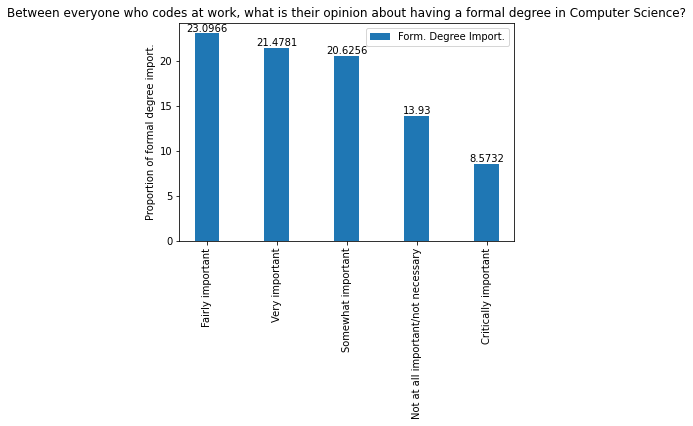

In [195]:
#Plot: professional or someone who codes X answers number of each category of importance

y = formal_degree_and_professional['NEWEdImpt'].value_counts()/formal_degree_and_professional.shape[0]*100
values_y = y.values.tolist()
index_y = y.index.tolist()
x = np.arange(len(index_y)) #the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x, values_y, width, label='Form. Degree Import.')
ax.set_ylabel('Proportion of formal degree import.')
ax.set_title('Between everyone who codes at work, what is their opinion about having a formal degree in Computer Science?')
ax.set_xticks(x)
ax.set_xticklabels(index_y, rotation=90)
ax.legend()
ax.bar_label(rects1, padding=0)

plt.show()

This first plot shows the histogram of different opinions of EVERYONE who works coding in the dataset from 2020. The marjority recognizes somehow the importance of doing a formal course in Computer Science.

**QUESTION 2. Is there any bias in this importance opinion depending on the degree they have?**

In [196]:
#Dropping rows in wich the value of column 'UndergradMajor' is different of Computer Science
formal_degree_and_compSci = professionals20[(professionals20.UndergradMajor == "Computer science, computer engineering, or software engineering")]

In [197]:
formal_degree_and_compSci.shape 


(31436, 4)

*Analysing and Visualizing 2020 data for question 2.*

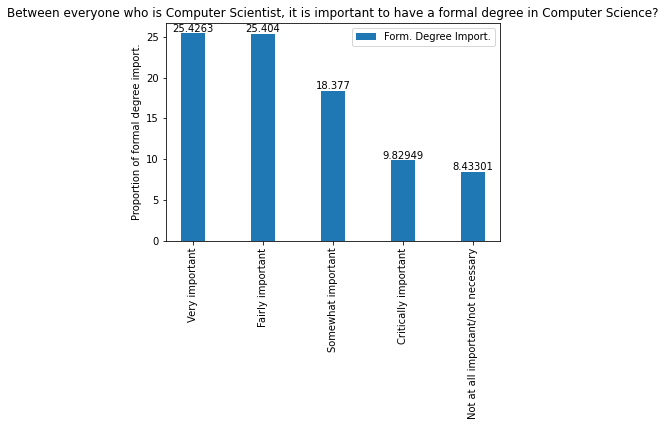

In [198]:
#professional and Computer Scientist X number of each category of importance

y1 = formal_degree_and_compSci['NEWEdImpt'].value_counts()/formal_degree_and_compSci.shape[0]*100
values_y1 = y1.values.tolist()
index_y1 = y1.index.tolist()
x1 = np.arange(len(index_y1)) #the label locations
width1 = 0.35  # the width of the bars
fig1, ax1 = plt.subplots()
rects2 = ax1.bar(x1, values_y1, width1, label='Form. Degree Import.')
ax1.set_ylabel('Proportion of formal degree import.')
ax1.set_title('Between everyone who is Computer Scientist, it is important to have a formal degree in Computer Science?')
ax1.set_xticks(x1)
ax1.set_xticklabels(index_y1, rotation=90)
ax1.legend()
ax1.bar_label(rects2, padding=0)

plt.show()

This plot shows the same information of the last one , but it represents only the answer from the people who works coding AND are Computer Scientists. Now the marjority believes that is VERY important have a formal degree in Computer Science (their own degree and profession).

In [199]:
#Dropping rows in wich the value of column 'UndergradMajor' is Computer Science, but including NaN
formal_degree_and_not_compSci = professionals20[(professionals20.UndergradMajor != "Computer science, computer engineering, or software engineering")]
formal_degree_and_not_compSci.shape 

(32183, 4)

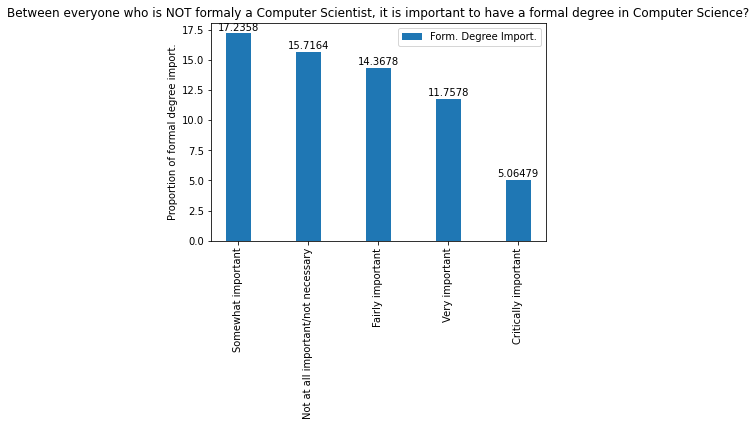

In [200]:
#professional and not a Computer Scientist X number of each category of importance

y2 = formal_degree_and_not_compSci['NEWEdImpt'].value_counts()/formal_degree_and_not_compSci.shape[0]*100
values_y2 = y2.values.tolist()
index_y2 = y2.index.tolist()
x2 = np.arange(len(index_y2)) #the label locations
width2 = 0.35  # the width of the bars
fig2, ax2 = plt.subplots()
rects3 = ax2.bar(x2, values_y2, width2, label='Form. Degree Import.')
ax2.set_ylabel('Proportion of formal degree import.')
ax2.set_title('Between everyone who is NOT formaly a Computer Scientist, it is important to have a formal degree in Computer Science?')
ax2.set_xticks(x2)
ax2.set_xticklabels(index_y2, rotation=90)
ax2.legend()
ax2.bar_label(rects3, padding=1)

plt.show()

This plot shows the same information of the first two, but it represents only the answer from the people who works coding AND are NOT Computer Scientists. Now the marjority believes that is SOMEWHAT important or NOT at all important have a formal degree in Computer Science. They achieved their career level by others manners, so probabily they think the formal degree something relatively important, but not essencial.

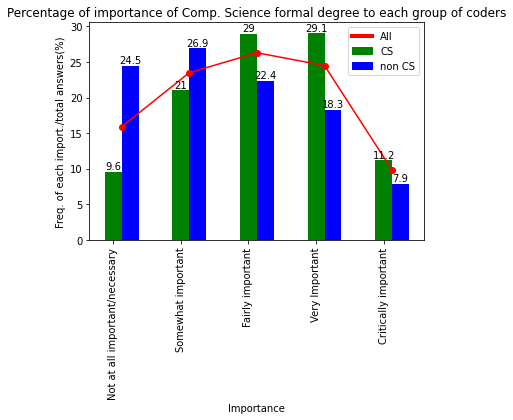

In [201]:
#Plotting the three charts in one 
data_index = ['Not at all important/necessary', 'Somewhat important', 'Fairly important','Very Important', 'Critically important']
general = [15.9,23.5,26.3,24.5,9.8]
CS = [9.6,21.0,29.0,29.1,11.2]
non_CS = [24.5,26.9,22.4,18.3,7.9]

data = [general,CS, non_CS]
X = np.arange(5)
line1, = plt.plot(X+0.375, data[0],color='red', marker='o', label = 'All coders')
bar2 = plt.bar(X + 0.25, data[1], width = 0.25, color = 'g')
bar3 = plt.bar(X + 0.50, data[2], width = 0.25, color = 'b')
plt.xticks(X+0.25,data_index,rotation=90)

plt.xlabel("Importance")
plt.ylabel('Freq. of each import./total answers(%)')
plt.title("Percentage of importance of Comp. Science formal degree to each group of coders")
plt.bar_label(bar2,padding=0)
plt.bar_label(bar3,padding=0)

legend_elements = [Line2D([0], [0], color='r', lw=4, label='All'),
                   Patch(facecolor='g', edgecolor='g',
                         label='CS'),
                   Patch(facecolor='b', edgecolor='b',
                         label='non CS')]

plt.legend(handles=legend_elements)
plt.show()


In the above graph we can see the results of the past three graphs. It shows the percentage per opinion of three groups: all coders who works(ALL = CS + non CS), computer scientists (CS) and the rest of the coders that aren't computer scientists (non CS). It is clear the bias between the groups, the people who is  CSs tend to give a bigger relevance to their formal degree than the people who are not CSs, and the red line tendendy follow the CS result because between the coders, the CSs are marjority. 

<b>QUESTION 3. Evaluating the people who had not a formal degree in some course related to Comp. Sci, Web Development or Information Sytem (a lot programming at Undergrad). How they are getting into the field proportionally along the time (number of non-formal degrees in computation employees/time)? <b>



*Data preparation for question 3:*

In [202]:
#Getting the number of non computer science professionals who works/worked with code
dev_not_compSci_20 = professionals20[(professionals20.UndergradMajor != 'Computer science, computer engineering, or software engineering') & 
                                     (professionals20.UndergradMajor != 'Web development or web design') & 
                                  (professionals20.UndergradMajor != 'Information systems, information technology, or system administration')]

#Ratio between the number of non computer scientists who works coding and the total
not_dev_degree_professionals20 = dev_not_compSci_20.shape[0]
ratio20 = not_dev_degree_professionals20/professionals20.shape[0]*100


In [203]:
#Getting statistics of dev or coder professionals profile from 2019 dataset 


#Filtering the rows from whose values are different from coder people employed or retired
filt_professionals19 = professionals19[(professionals19.MainBranch != 'I am a student who is learning to code') &
                     (professionals19.MainBranch != 'I code primarily as a hobby')]
filt_professionals19 = filt_professionals19[(filt_professionals19.Employment != 'Not employed, and not looking for work') 
                                           & (filt_professionals19.Employment != 'Not employed, and looking for work')
                                           & (filt_professionals19.Employment != 'Student')]

#Filtering from people who have a computer science degree or some other related field
dev_not_compSci_19 = filt_professionals19[(filt_professionals19.UndergradMajor != 'Computer science, computer engineering, or software engineering') & 
                                     (filt_professionals19.UndergradMajor != 'Web development or web design') & 
                                  (filt_professionals19.UndergradMajor != 'Information systems, information technology, or system administration')]

#Ratio between the number of non computer scientists who works coding and the total
ratio19 = dev_not_compSci_19.shape[0]/filt_professionals19.shape[0]*100




In [204]:
#Getting statistics of dev or coder professionals profile from 2018 dataset 

#Filtering who is not employed
professionals18 = professionals18[(professionals18.Employment != 'Not employed, and not looking for work')
                                 & (professionals18.Employment != 'Not employed, but looking for work') ]


In [205]:
#Checking which not dev professions are contained in DevType in 2018 dataset
np.set_printoptions(threshold=np.inf)
not_dev_professions = []
for profession in professionals18['DevType'].unique():
    if 'developer' not in profession:
        if profession not in not_dev_professions:
            print(profession, '/')
            not_dev_professions.append(profession)
#The result bellow shows all the unique possibilities of answers combination of DevType          
            
    

Designer /
Student /
Data or business analyst;Data scientist or machine learning specialist;Database administrator;DevOps specialist /
Data scientist or machine learning specialist;Student /
C-suite executive (CEO, CTO, etc.) /
Data or business analyst;Database administrator;DevOps specialist;System administrator /
Data scientist or machine learning specialist /
DevOps specialist /
Data or business analyst /
Data scientist or machine learning specialist;Database administrator /
Data scientist or machine learning specialist;Engineering manager /
System administrator /
Database administrator;DevOps specialist;System administrator /
Engineering manager /
Data scientist or machine learning specialist;Educator or academic researcher /
Database administrator;Designer /
Marketing or sales professional /
Data or business analyst;Data scientist or machine learning specialist /
Data or business analyst;Data scientist or machine learning specialist;Engineering manager /
Database administrator;Sys

In [206]:
#Filtering who does not work in the market coding from the above list
professionals18 = professionals18[('C-suite executive (CEO, CTO, etc.)' != professionals18.DevType) & 
('Student' != professionals18.DevType)& 
('Designer' != professionals18.DevType)&
('Marketing or sales professional' != professionals18.DevType)&
('Educator or academic researcher'!= professionals18.DevType)]

In [207]:
#Getting the number of people who works in the market coding somehow without a formal degree in computation 
non_compSci18 = professionals18[(professionals18.UndergradMajor != 'Computer science, computer engineering, or software engineering')
                & (professionals18.UndergradMajor != 'Information systems, information technology, or system administration')
                & (professionals18.UndergradMajor != 'Web development or web design')]

In [208]:
#2018 ratio between professionals who had notDepending on your degree, there is difference in salary or compensation if you work coding? How does it is indicated along the time? a computation degree and general
ratio18 = non_compSci18.shape[0]/professionals18.shape[0]*100

In [209]:
#All process done before to 2017 data:
professionals17 = professionals17[(professionals17.Professional != 'Student')
                                 & (professionals17.Professional != 'None of these')]

In [210]:
professionals17['EmploymentStatus'].unique()

array(['Employed full-time',
       'Independent contractor, freelancer, or self-employed',
       'Not employed, but looking for work',
       'Not employed, and not looking for work', 'Employed part-time',
       'I prefer not to say', 'Retired'], dtype=object)

In [211]:
professionals17 = professionals17[(professionals17.EmploymentStatus != 'Not employed, but looking for work')
                                 & (professionals17.EmploymentStatus != 'Not employed, and not looking for work')
                                 & (professionals17.EmploymentStatus != 'I prefer not to say')]

In [212]:
#Getting the number of people who works in the market coding somehow without a formal degree in computation 
ratio_non_compSci17 = professionals17[(professionals17.MajorUndergrad != 'Computer science or software engineering')
                & (professionals17.MajorUndergrad != 'Computer engineering or electrical/electronics engineering')
                & (professionals17.MajorUndergrad != 'Computer programming or Web development')
                & (professionals17.MajorUndergrad != 'Information technology, networking, or system administration')]                   

In [213]:
ratio17 = ratio_non_compSci17.shape[0]/professionals17.shape[0]*100

[Text(0, 0, '32.0626'),
 Text(0, 0, '32.8012'),
 Text(0, 0, '32.0942'),
 Text(0, 0, '41.4373')]

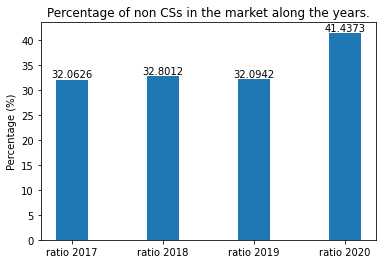

In [214]:
#Graphic of this rate along the time:
x_years = np.arange(4) #the label locations
years_values_y = [ratio17, ratio18, ratio19, ratio20]
x_labels = ['ratio 2017', 'ratio 2018', 'ratio 2019', 'ratio 2020']
bar_width = 0.35
fig3, ax3 = plt.subplots()
rects4 = ax3.bar(x_years, years_values_y, bar_width)
ax3.set_ylabel('Percentage (%)')
ax3.set_xticks(x_years)
ax3.set_xticklabels(x_labels)
ax3.set_title("Percentage of non CSs in the market along the years.")
ax3.bar_label(rects4, padding = 0)


The number of non CSs between all the coders (its percentage in the market) tended to be almost constant along those four years, considering the datasets used).

<b>QUESTION 4. Is there difference between the salary of people who have a formal degree in Comp Sci and who haven't? Let's see the percentage difference along the years 2020 and 2017:<b>


To answer this question the rows without a real value of salary or compensation in US dollar were dropped (Nan).

In [215]:
#2020
not_computerSci20 = data20[(data20.UndergradMajor != 'Computer science, computer engineering, or software engineering') & 
                  (data20.UndergradMajor != 'Web development or web design') & 
                  (data20.UndergradMajor != 'Information systems, information technology, or system administration') & 
                  (data20.MainBranch != 'I am a student who is learning to code') &
                  (data20.MainBranch != 'I code primarily as a hobby') &
                  (data20.Employment != 'Not employed, and not looking for work') &
                  (data20.Employment != 'Not employed, and looking for work') &
                  (data20.Employment != 'Student')]
not_computerSci20 = not_computerSci20[['UndergradMajor', 'MainBranch','Country', 'Employment','CompFreq','CompTotal','ConvertedComp','CurrencyDesc']]


In [216]:
compensation20 = not_computerSci20[not_computerSci20.ConvertedComp != 0].dropna(subset=['ConvertedComp']) #11203 people answered
not_computerSci20.shape #19897 people answered totally without dropna
not_computerSci20.iloc[1,5]
not_computerSci20['CompTotal'].isna().sum() #8694 nan em CompTotal
not_computerSci20['ConvertedComp'].isna().sum() #8723 nan em ConvertedComp
compensation20.shape[0]

11115

In [217]:
#THE PEOPLE WHO HAVE NOT A FORMAL SCI COMP EDUCATION WORLDWIDE EARN U$111,249U ANNUALY 
compensation20_sorted = compensation20.sort_values(['ConvertedComp'],ascending=False)
not_compSci_compens_mean20 = compensation20_sorted['ConvertedComp'].mean() 

In [218]:
computerSci20 = data20[(data20.UndergradMajor == 'Computer science, computer engineering, or software engineering') |
                  (data20.UndergradMajor == 'Web development or web design') |
                  (data20.UndergradMajor == 'Information systems, information technology, or system administration') & 
                  (data20.MainBranch != 'I am a student who is learning to code') &
                  (data20.MainBranch != 'I code primarily as a hobby') &
                  (data20.Employment != 'Not employed, and not looking for work') &
                  (data20.Employment != 'Not employed, and looking for work') &
                  (data20.Employment != 'Student')]
compSci_compens20 = computerSci20[['UndergradMajor', 'MainBranch','Country', 'Employment','CompFreq','CompTotal','ConvertedComp','CurrencyDesc']]


In [219]:
compSci_compens20 = compSci_compens20[compSci_compens20.ConvertedComp != 0].dropna(subset=['ConvertedComp']) 
compSci_compens20.shape # #23499 people answered totally without dropna and without 0
computerSci20['CompTotal'].dropna().shape #23623 (124 didin't converted to U$dollar annualy)


(23623,)

In [220]:
#THE PEOPLE WHO HAVE A FORMAL SCI COMP EDUCATION (or similar) WORLDWIDE EARN U$100,838.40 ANNUALY IN AVERAGE
compSci_compens20_sorted = compSci_compens20.sort_values(['ConvertedComp'],ascending=False)
compSci_compens_mean20 = compSci_compens20['ConvertedComp'].mean()
compSci_compens_mean20

100838.40286820715

In [221]:
#DIFFERENCE PERCENTAGE 2020 BETWEEN COMPUTER SCIENTISTS AND WHO'S NOT = 10,32%
dif_perc20 = (not_compSci_compens_mean20-compSci_compens_mean20)/compSci_compens_mean20*100
dif_perc20


10.32502284724738

In [222]:
#2019
computerSci19 = data19[(data19.UndergradMajor == 'Computer science, computer engineering, or software engineering') |
                  (data19.UndergradMajor == 'Web development or web design') |
                  (data19.UndergradMajor == 'Information systems, information technology, or system administration') & 
                  (data19.MainBranch != 'I am a student who is learning to code') &
                  (data19.MainBranch != 'I code primarily as a hobby') &
                  (data19.Employment != 'Not employed, and not looking for work') &
                  (data19.Employment != 'Not employed, and looking for work') &
                  (data19.Employment != 'Student')]
compSci_compens19 = computerSci19[['UndergradMajor', 'MainBranch','Country', 'Employment','CompFreq','CompTotal','ConvertedComp','CurrencyDesc']]
compSci_compens19 = compSci_compens19[compSci_compens19.ConvertedComp != 0].dropna(subset=['ConvertedComp']) 
compSci_compens19.shape #37715 people answered totally without dropna and without 0
computerSci19['CompTotal'].dropna().shape #37935 (220 didin't converted to U$ dollar annualy)

#THE PEOPLE WHO HAVE A FORMAL SCI COMP EDUCATION (or similar) WORLDWIDE EARN U$124,224.99 ANNUALY IN AVERAGE
compSci_compens19_sorted = compSci_compens19.sort_values(['ConvertedComp'],ascending=False)
compSci_compens_mean19 = compSci_compens19['ConvertedComp'].mean()

In [223]:
not_computerSci19 = data19[(data19.UndergradMajor != 'Computer science, computer engineering, or software engineering') &
                  (data19.UndergradMajor != 'Web development or web design') &
                  (data19.UndergradMajor != 'Information systems, information technology, or system administration') & 
                  (data19.MainBranch != 'I am a student who is learning to code') &
                  (data19.MainBranch != 'I code primarily as a hobby') &
                  (data19.Employment != 'Not employed, and not looking for work') &
                  (data19.Employment != 'Not employed, and looking for work') &
                  (data19.Employment != 'Student')]
not_computerSci19 = not_computerSci19[['UndergradMajor', 'MainBranch','Country', 'Employment','CompFreq','CompTotal','ConvertedComp','CurrencyDesc']]
compensation19 = not_computerSci19[not_computerSci19.ConvertedComp != 0].dropna(subset=['ConvertedComp']) #17,909 people answered
not_computerSci19.shape #24318 people answered totally without dropna, counting with Nan and 0's
not_computerSci19['CompTotal'].isna().sum() #6308 nan em CompTotal
not_computerSci19['ConvertedComp'].isna().sum() #6341 nan em ConvertedComp

#THE PEOPLE WHO HAVE NOT A FORMAL SCI COMP EDUCATION WORLDWIDE EARN U$134,600.33 ANNUALY 
compensation19_sorted = compensation19.sort_values(['ConvertedComp'],ascending=False)
not_compSci_compens_mean19 = compensation19_sorted['ConvertedComp'].mean()

In [224]:
#DIFFERENCE PERCENTAGE 2019 BETWEEN COMPUTER SCIENTISTS AND WHO'S NOT = 8,32%
dif_perc19 = (not_compSci_compens_mean19-compSci_compens_mean19)/compSci_compens_mean19*100
dif_perc19

8.352059995452716

In [225]:
#2018
not_compSci_salary18 = data18.iloc[ratio_non_compSci18.index.values]
not_compSci_compens18 = not_compSci_salary18[['UndergradMajor', 'Employment','DevType','ConvertedSalary']]
not_compSci_compens18 = not_compSci_compens18.sort_values(['ConvertedSalary'],ascending=False)

In [226]:
not_compSci_compens18 = not_compSci_compens18[not_compSci_compens18.ConvertedSalary != 0].dropna(subset=['ConvertedSalary']) 
not_compSci_salary18.shape #26,117 people answered totally without dropna, counting with Nan and 0's
not_compSci_compens18.shape # 14,909 answered with real values their converted annualy salaries

#THE PEOPLE WHO DON'T HAVE A FORMAL SCI COMP EDUCATION (or similar) WORLDWIDE EARN U$103,226.44 ANNUALY IN AVERAGE IN 2018
not_compSci_salary_mean18 = not_compSci_compens18['ConvertedSalary'].mean()
not_compSci_salary_mean18

103226.43537460595

In [227]:
compSci18 = professionals18[(professionals18.UndergradMajor == 'Computer science, computer engineering, or software engineering')
                | (professionals18.UndergradMajor == 'Information systems, information technology, or system administration')
                | (professionals18.UndergradMajor == 'Web development or web design')]

In [228]:
compSci_salary18 = data18.iloc[compSci18.index.values]
compSci_compens18 = compSci_salary18[['UndergradMajor','Employment','DevType','ConvertedSalary']]
compSci_compens18 = compSci_compens18.sort_values(['ConvertedSalary'],ascending=False)

In [229]:
compSci_compens18 = compSci_compens18[compSci_compens18.ConvertedSalary != 0].dropna(subset=['ConvertedSalary'])
compSci_salary18.shape # 53,505 people answered totally without dropna, counting with Nan and 0's
compSci_compens18.shape # 29,867 answered with real values their converted annualy salaries

#THE PEOPLE WHO HAVE A FORMAL SCI COMP EDUCATION (or similar) WORLDWIDE EARN U$96,238,03 ANNUALY IN AVERAGE
compSci_salary_mean18 = compSci_compens18['ConvertedSalary'].mean()
compSci_salary_mean18

96238.02996618341

In [230]:
#DIFFERENCE PERCENTAGE 2018 BETWEEN COMPUTER SCIENTISTS AND WHO'S NOT = 7.26%
dif_perc18 = (not_compSci_salary_mean18-compSci_salary_mean18)/compSci_salary_mean18*100
dif_perc18

7.261584023361819

In [231]:
#2017
not_compSci_salary17 = data17.iloc[ratio_non_compSci17.index.values]
not_compSci_salary_filtered_17 = not_compSci_salary17[['MajorUndergrad','EmploymentStatus','Salary','Currency']].dropna(subset=['Salary','Currency'])
not_compSci_salary_filtered_17 = not_compSci_salary_filtered_17[(not_compSci_salary_filtered_17.Currency == 'U.S. dollars ($)')
                                             & (not_compSci_salary_filtered_17.Salary != 0)]
                                              

In [232]:
not_compSci_salary17.shape #13,129 people answered totally without dropna, counting with Nan and 0's
not_compSci_salary_filtered_17.shape # 1,439 answered with real values their converted annualy salaries and HAD US DOLLAR CURRENCY


(1439, 4)

In [233]:
#THE PEOPLE WHO DON'T HAVE A FORMAL SCI COMP EDUCATION (or similar) WORLDWIDE EARN U$90,597.18 ANNUALY IN AVERAGE IN 2017
not_compSci_salary_mean17 = not_compSci_salary_filtered_17['Salary'].mean()
not_compSci_salary_mean17

90597.17904454713

In [234]:
compSci_salary17 = professionals17[(professionals17.MajorUndergrad == 'Computer science or software engineering')
                | (professionals17.MajorUndergrad == 'Computer engineering or electrical/electronics engineering')
                | (professionals17.MajorUndergrad == 'Computer programming or Web development')
                | (professionals17.MajorUndergrad == 'Information technology, networking, or system administration')]  

In [235]:
compSci_salary17 = data17.iloc[compSci_salary17.index.values]
compSci_salary_filtered_17 = compSci_salary17[['MajorUndergrad','EmploymentStatus','Salary','Currency']].dropna(subset=['Salary','Currency'])
compSci_salary_filtered_17 = compSci_salary_filtered_17[(compSci_salary_filtered_17.Currency == 'U.S. dollars ($)')
                                             & (compSci_salary_filtered_17.Salary != 0)]

In [236]:
compSci_salary17.shape #27,819 people answered totally without dropna, counting with Nan and 0's
compSci_salary_filtered_17.shape # 2,849 answered with real values their converted annualy salaries and HAD US DOLLAR CURRENCY


(2849, 4)

In [237]:
#THE PEOPLE WHO DON'T HAVE A FORMAL SCI COMP EDUCATION (or similar) WORLDWIDE EARN U$87,346.46 ANNUALY IN AVERAGE IN 2017
compSci_salary_mean17 = compSci_salary_filtered_17['Salary'].mean()
compSci_salary_mean17

87346.47654340298

In [238]:
#DIFFERENCE PERCENTAGE 2018 BETWEEN COMPUTER SCIENTISTS AND WHO'S NOT = 3,72%
dif_perc17 = (not_compSci_salary_mean17-compSci_salary_mean17)/compSci_salary_mean17*100
dif_perc17

3.7216183523199704

[Text(0, 0, '3.72162'),
 Text(0, 0, '7.26158'),
 Text(0, 0, '8.35206'),
 Text(0, 0, '10.325')]

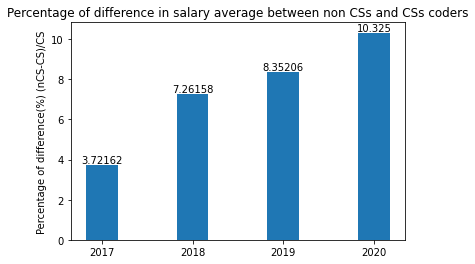

In [239]:
#Plotting the differences of salary or compencies along the years
x_years  #the label locations
diff_perc_y = [dif_perc17, dif_perc18, dif_perc19, dif_perc20]
x_labels_diff = [ '2017', '2018', '2019', '2020']
bar_width 
fig4, ax4 = plt.subplots()
rects5 = ax4.bar(x_years, diff_perc_y, bar_width)
ax4.set_ylabel('Percentage of difference(%) (nCS-CS)/CS')
ax4.set_xticks(x_years)
ax4.set_xticklabels(x_labels_diff)
ax4.set_title("Percentage of difference in salary average between non CSs and CSs coders")
ax4.bar_label(rects5, padding = 0)


This last plot shows something interesting, the percentual difference in the average salary between CSs and non CSs tended to grow along those four years, while the percentage of non CSs in the market tended to be almost constant in 32%. 

**5) What is the compensation mean of non CSs depending on their Educational level or Major Undergrad (if it is the case)?**

In [240]:
data20_edLevel = data20.iloc[not_computerSci20.index.values]
data20_edLevel = data20_edLevel[['UndergradMajor','DevType', 'EdLevel', 'ConvertedComp']].dropna(subset=['ConvertedComp'])
data20_edLevel['EdLevel'].value_counts()

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          4159
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       2805
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)    1466
Some college/university study without earning a degree                                1202
Other doctoral degree (Ph.D., Ed.D., etc.)                                             722
Associate degree (A.A., A.S., etc.)                                                    230
I never completed any formal education                                                 154
Primary/elementary school                                                              153
Professional degree (JD, MD, etc.)                                                     142
Name: EdLevel, dtype: int64

In [241]:
data20_edLevel['UndergradMajor'].value_counts()

Another engineering discipline (such as civil, electrical, mechanical, etc.)      2931
A natural science (such as biology, chemistry, physics, etc.)                     1485
Mathematics or statistics                                                         1199
A business discipline (such as accounting, finance, marketing, etc.)               825
A humanities discipline (such as literature, history, philosophy, etc.)            719
A social science (such as anthropology, psychology, political science, etc.)       620
Fine arts or performing arts (such as graphic design, music, studio art, etc.)     508
I never declared a major                                                           232
A health science (such as nursing, pharmacy, radiology, etc.)                      127
Name: UndergradMajor, dtype: int64

In [242]:
def compensation_mean(data_serie_filter, data, value):
    '''
    Function to calculate the average compensation that each group of people from some Undergrad or other study level earns
    Input:
     data_serie_filter = a pandas Series ex: data.column_name
     data = pandas dataframe name
     value = string containing the value, Undergraduate or Education leve, you want to know the compensation mean
    Returns:
     num_people = int with the number of people
     compensation_mean = float with the compensation mean for each group
    '''
    value_dataframe = data[data_serie_filter == value]
    num_people = value_dataframe.shape[0]
    compensation_mean = value_dataframe['ConvertedComp'].mean()
    return num_people, compensation_mean

math_e_stats_shape20, math_e_stats20 = compensation_mean(data20_edLevel.UndergradMajor,data20_edLevel,'Mathematics or statistics')
#1199 people who did math and stats and work coding
#U$130,102.59 annualy

eng_shape20, engineering20 = compensation_mean(data20_edLevel.UndergradMajor,data20_edLevel,'Another engineering discipline (such as civil, electrical, mechanical, etc.)')
#2931 work coding 
#U$92776.57 annualy

nat_sci_shape20, nat_sci_comp_mean20 = compensation_mean(data20_edLevel.UndergradMajor,data20_edLevel,'A natural science (such as biology, chemistry, physics, etc.)')
#1485 work coding 
#U$113,949.78 

arts_shape20, arts_comp_mean20 = compensation_mean(data20_edLevel.UndergradMajor,data20_edLevel,'Fine arts or performing arts (such as graphic design, music, studio art, etc.)')
#508 work coding
#U$159630.37

no_major_shape20, no_major_comp_mean20 = compensation_mean(data20_edLevel.UndergradMajor,data20_edLevel, 'I never declared a major')
#232
#U$134,906.59

human_shape20, human_comp_mean20 = compensation_mean(data20_edLevel.UndergradMajor,data20_edLevel,'A humanities discipline (such as literature, history, philosophy, etc.)')
#719
#145240.65

health_shape20, health_comp_mean20 = compensation_mean(data20_edLevel.UndergradMajor,data20_edLevel,'A health science (such as nursing, pharmacy, radiology, etc.)')
#127
#U$70,738.69

social_shape20, social_comp_mean20 = compensation_mean(data20_edLevel.UndergradMajor,data20_edLevel,'A social science (such as anthropology, psychology, political science, etc.)')
#620
#U$130,689.14

business_shape20, business_comp_mean20 = compensation_mean(data20_edLevel.UndergradMajor,data20_edLevel,'A business discipline (such as accounting, finance, marketing, etc.)')
#825
#U$109,906.89

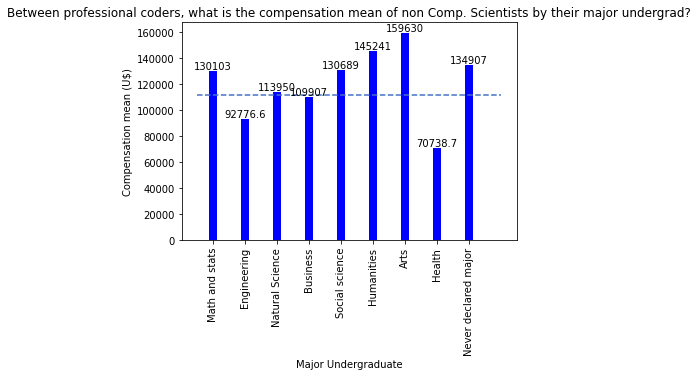

In [247]:
#Plotting the edLevel salary charts in one 
data_index = ['Math and stats','Engineering', 'Natural Science', 'Business','Social science', 'Humanities', 'Arts', 'Health', 'Never declared major']


data = [math_e_stats20, engineering20,nat_sci_comp_mean20,business_comp_mean20,social_comp_mean20,human_comp_mean20,arts_comp_mean20, health_comp_mean20, no_major_comp_mean20]
X = np.arange(len(data))
bar1 = plt.bar(X, data, width = 0.25, color = 'b')
plt.xticks(X,data_index,rotation=90)

plt.xlabel("Major Undergraduate")
plt.ylabel('Compensation mean (U$)')
plt.title("Between professional coders, what is the compensation mean of non Comp. Scientists by their major undergrad?")
plt.bar_label(bar1,padding=0)
plt.hlines(not_compSci_compens_mean20,-0.5,9,linestyles='--',colors='#4472C4',label='average')


plt.show()

The result was really unexpected! The people from Arts and Social Science earns more than coders of Maths and Stats, and Engineering, annualy. 


In [244]:
#Getting the compensation per each education level from data 2020 
#Now it will be acquired the same information of compensation betwwen non CSs, but now 
#relating to their Educational Level


In [251]:
#Types of Educational Levels
data20_edLevel['EdLevel'].unique()

array(['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Some college/university study without earning a degree',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Professional degree (JD, MD, etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)', nan,
       'Primary/elementary school',
       'I never completed any formal education',
       'Associate degree (A.A., A.S., etc.)'], dtype=object)

In [ ]:
#Getting the compensation value of each educational level (above listed) and their amount per class
bach_shape20, bach_mean20 = compensation_mean(data20_edLevel.EdLevel,data20_edLevel,'Bachelor’s degree (B.A., B.S., B.Eng., etc.)')
master_shape20, master_mean20 = compensation_mean(data20_edLevel.EdLevel,data20_edLevel,'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)')
secondary_shape20, secondary_mean20 = compensation_mean(data20_edLevel.EdLevel,data20_edLevel,'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)')
nondegree_shape20, nondegree_mean20 = compensation_mean(data20_edLevel.EdLevel,data20_edLevel,'Some college/university study without earning a degree')
doc_shape20, doc_mean20 = compensation_mean(data20_edLevel.EdLevel,data20_edLevel,'Other doctoral degree (Ph.D., Ed.D., etc.)')
assoc_shape20, assoc_mean20 = compensation_mean(data20_edLevel.EdLevel,data20_edLevel,'Associate degree (A.A., A.S., etc.)')
primary_shape20, primary_mean20 = compensation_mean(data20_edLevel.EdLevel,data20_edLevel,'Primary/elementary school')
nonformal_shape20, nonformal_mean20 = compensation_mean(data20_edLevel.EdLevel,data20_edLevel,'I never completed any formal education')
profess_shape20, profess_mean20 = compensation_mean(data20_edLevel.EdLevel,data20_edLevel,'Professional degree (JD, MD, etc.)')


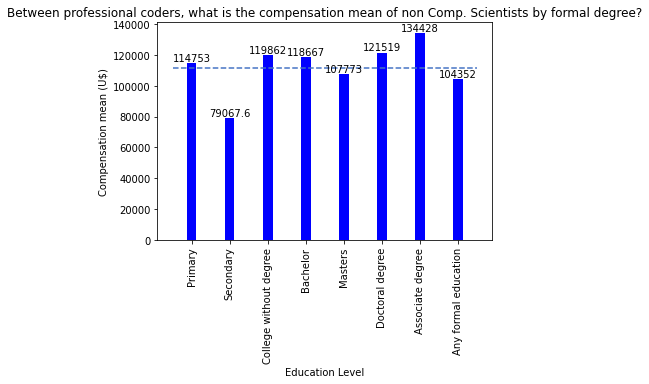

In [245]:
#Plotting the edLevel salary charts in one 
data_index = ['Primary','Secondary', 'College without degree', 'Bachelor','Masters', 'Doctoral degree', 'Associate degree', 'Any formal education']

data = [primary_mean20,secondary_mean20,nondegree_mean20,bach_mean20,master_mean20,doc_mean20,assoc_mean20, nonformal_mean20]
X = np.arange(len(data))
bar1 = plt.bar(X, data, width = 0.25, color = 'b')
plt.xticks(X,data_index,rotation=90)

plt.xlabel("Education Level")
plt.ylabel('Compensation mean (U$)')
plt.title("Between professional coders, what is the compensation mean of non Comp. Scientists by formal degree?")
plt.bar_label(bar1,padding=0)
plt.hlines(not_compSci_compens_mean20,-0.5,7.5,linestyles='--',colors='#4472C4',label='average')


plt.show()

Above we can see that the coders who earns more are the ones with Associate Degree  level of education and the people with phD are just the second. This result shows that how much you earn can't be directly related to higher educational levels as we imagine.